In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow

About Dataset
This dataset contains extensive health information for 2,392 patients diagnosed with Asthma Disease, uniquely identified with IDs ranging from 5034 to 7425. It includes demographic details, lifestyle factors, environmental and allergy factors, medical history, clinical measurements, symptoms, and a diagnosis indicator. This dataset is valuable for researchers and data scientists aiming to explore factors associated with Asthma, develop predictive models, and conduct statistical analyses.

Table of Contents
Patient Information
Patient ID
Demographic Details
Lifestyle Factors
Environmental and Allergy Factors
Medical History
Clinical Measurements
Symptoms
Diagnosis Information
Confidential Information
Patient Information
Patient ID
PatientID: A unique identifier assigned to each patient (5034 to 7425).
Demographic Details
Age: The age of the patients ranges from 5 to 80 years.
Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
Ethnicity: The ethnicity of the patients, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other
EducationLevel: The education level of the patients, coded as follows:
0: None
1: High School
2: Bachelor's
3: Higher
Lifestyle Factors
BMI: Body Mass Index of the patients, ranging from 15 to 40.
Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
DietQuality: Diet quality score, ranging from 0 to 10.
SleepQuality: Sleep quality score, ranging from 4 to 10.
Environmental and Allergy Factors
PollutionExposure: Exposure to pollution, score from 0 to 10.
PollenExposure: Exposure to pollen, score from 0 to 10.
DustExposure: Exposure to dust, score from 0 to 10.
PetAllergy: Pet allergy status, where 0 indicates No and 1 indicates Yes.
Medical History
FamilyHistoryAsthma: Family history of asthma, where 0 indicates No and 1 indicates Yes.
HistoryOfAllergies: History of allergies, where 0 indicates No and 1 indicates Yes.
Eczema: Presence of eczema, where 0 indicates No and 1 indicates Yes.
HayFever: Presence of hay fever, where 0 indicates No and 1 indicates Yes.
GastroesophagealReflux: Presence of gastroesophageal reflux, where 0 indicates No and 1 indicates Yes.
Clinical Measurements
LungFunctionFEV1: Forced Expiratory Volume in 1 second (FEV1), ranging from 1.0 to 4.0 liters.
LungFunctionFVC: Forced Vital Capacity (FVC), ranging from 1.5 to 6.0 liters.
Symptoms
Wheezing: Presence of wheezing, where 0 indicates No and 1 indicates Yes.
ShortnessOfBreath: Presence of shortness of breath, where 0 indicates No and 1 indicates Yes.
ChestTightness: Presence of chest tightness, where 0 indicates No and 1 indicates Yes.
Coughing: Presence of coughing, where 0 indicates No and 1 indicates Yes.
NighttimeSymptoms: Presence of nighttime symptoms, where 0 indicates No and 1 indicates Yes.
ExerciseInduced: Presence of symptoms induced by exercise, where 0 indicates No and 1 indicates Yes.
Diagnosis Information
Diagnosis: Diagnosis status for Asthma, where 0 indicates No and 1 indicates Yes.
Confidential Information
DoctorInCharge: This column contains confidential information about the doctor in charge, with "Dr_Confid" as the value for all patients

In [3]:
df=pd.read_csv('../Datasets/asthma_disease_data.csv')
df.sample(5)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
1826,6860,5,0,1,0,36.172342,0,5.417269,4.478271,5.777935,...,3.277718,3.140847,1,0,1,1,1,0,0,Dr_Confid
427,5461,27,0,0,2,36.923379,1,5.736639,9.544028,4.368880,...,1.368992,2.983025,1,1,1,0,1,0,0,Dr_Confid
1091,6125,60,1,0,3,38.775856,0,3.526013,3.507276,9.398021,...,2.174392,3.652398,0,1,0,0,1,0,0,Dr_Confid
2002,7036,23,1,0,1,19.287951,0,1.185460,0.689749,7.332937,...,1.207175,3.306909,0,1,1,1,0,1,0,Dr_Confid
2303,7337,63,1,2,1,16.810818,0,9.543514,7.752853,5.836376,...,2.729387,4.160882,1,0,0,1,0,1,1,Dr_Confid


In [4]:
df.isna().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [5]:
num_duplicates = df.duplicated().sum()
print(num_duplicates)

0


In [6]:
df.drop(['DoctorInCharge','PatientID',],axis=1,inplace=True)

In [7]:
df.sample(5)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
1935,57,1,0,1,15.697274,0,2.063438,5.912047,5.882692,4.232425,...,0,1.355374,2.050053,1,1,1,0,1,1,0
1739,77,0,1,2,17.451314,0,0.477405,3.347285,4.903447,9.246703,...,1,1.446080,3.669650,0,1,1,1,1,1,0
1662,33,1,0,0,18.157773,0,6.543843,4.588975,5.235392,4.040630,...,0,2.913308,3.342519,0,1,0,1,0,0,0
295,34,0,0,1,16.606896,0,9.838012,6.032659,7.747415,3.325100,...,0,2.244168,2.993966,0,1,0,1,0,0,0
2367,13,1,0,1,26.115636,0,6.197025,3.112706,7.889449,9.654632,...,0,1.748987,4.230740,1,0,1,0,0,0,0


In [29]:
df['Diagnosis'].value_counts()

Diagnosis
0    2268
1     124
Name: count, dtype: int64

In [8]:
correleation=df.corr()
correleation

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
Age,1.000000,-0.003205,0.020022,-0.006711,0.016184,-0.009309,0.000053,0.004262,0.002718,-0.042311,...,0.019516,-0.007535,0.009594,0.007899,0.024534,-0.006197,0.028948,-0.026368,0.016008,-0.015111
Gender,-0.003205,1.000000,0.019266,-0.026615,0.023856,-0.012545,0.021761,-0.015375,-0.023442,0.000744,...,-0.003373,0.013243,-0.027673,-0.012716,0.020916,0.000089,-0.008273,-0.004889,0.029384,0.003128
Ethnicity,0.020022,0.019266,1.000000,0.004130,0.013947,-0.007343,0.036608,0.009032,-0.010136,-0.037757,...,-0.015297,-0.017714,0.031680,-0.012132,0.018938,-0.013025,-0.026594,0.014656,0.014656,0.017124
EducationLevel,-0.006711,-0.026615,0.004130,1.000000,0.004501,0.013126,-0.015380,-0.037059,0.017655,0.026831,...,0.024057,-0.003145,-0.001876,0.014067,0.009490,-0.031617,-0.017651,-0.000744,-0.008214,0.008185
BMI,0.016184,0.023856,0.013947,0.004501,1.000000,0.004890,-0.012046,-0.014996,-0.012891,-0.028962,...,0.010484,-0.010356,0.003358,0.045725,0.015136,-0.009908,-0.003992,-0.001453,0.011947,-0.012522
Smoking,-0.009309,-0.012545,-0.007343,0.013126,0.004890,1.000000,0.013838,-0.027010,-0.012348,0.011038,...,0.034271,0.015578,0.016444,-0.005121,-0.059075,-0.011109,-0.013507,0.014152,-0.002629,-0.019321
PhysicalActivity,0.000053,0.021761,0.036608,-0.015380,-0.012046,0.013838,1.000000,0.049487,0.007208,-0.029539,...,-0.035085,0.015749,-0.029711,0.013758,-0.024513,-0.028887,0.000670,-0.009144,-0.004371,0.005066
DietQuality,0.004262,-0.015375,0.009032,-0.037059,-0.014996,-0.027010,0.049487,1.000000,0.014355,0.006955,...,0.020919,-0.007315,-0.002165,0.039474,0.035641,0.012674,-0.013483,0.022328,-0.024092,-0.003149
SleepQuality,0.002718,-0.023442,-0.010136,0.017655,-0.012891,-0.012348,0.007208,0.014355,1.000000,-0.029374,...,-0.035456,-0.003637,0.000808,0.010577,-0.011363,-0.006576,0.015291,-0.005175,-0.026065,0.018022
PollutionExposure,-0.042311,0.000744,-0.037757,0.026831,-0.028962,0.011038,-0.029539,0.006955,-0.029374,1.000000,...,0.006201,-0.024337,0.027617,-0.007375,0.019123,0.027246,0.005673,0.014951,-0.009472,-0.004535


<Axes: >

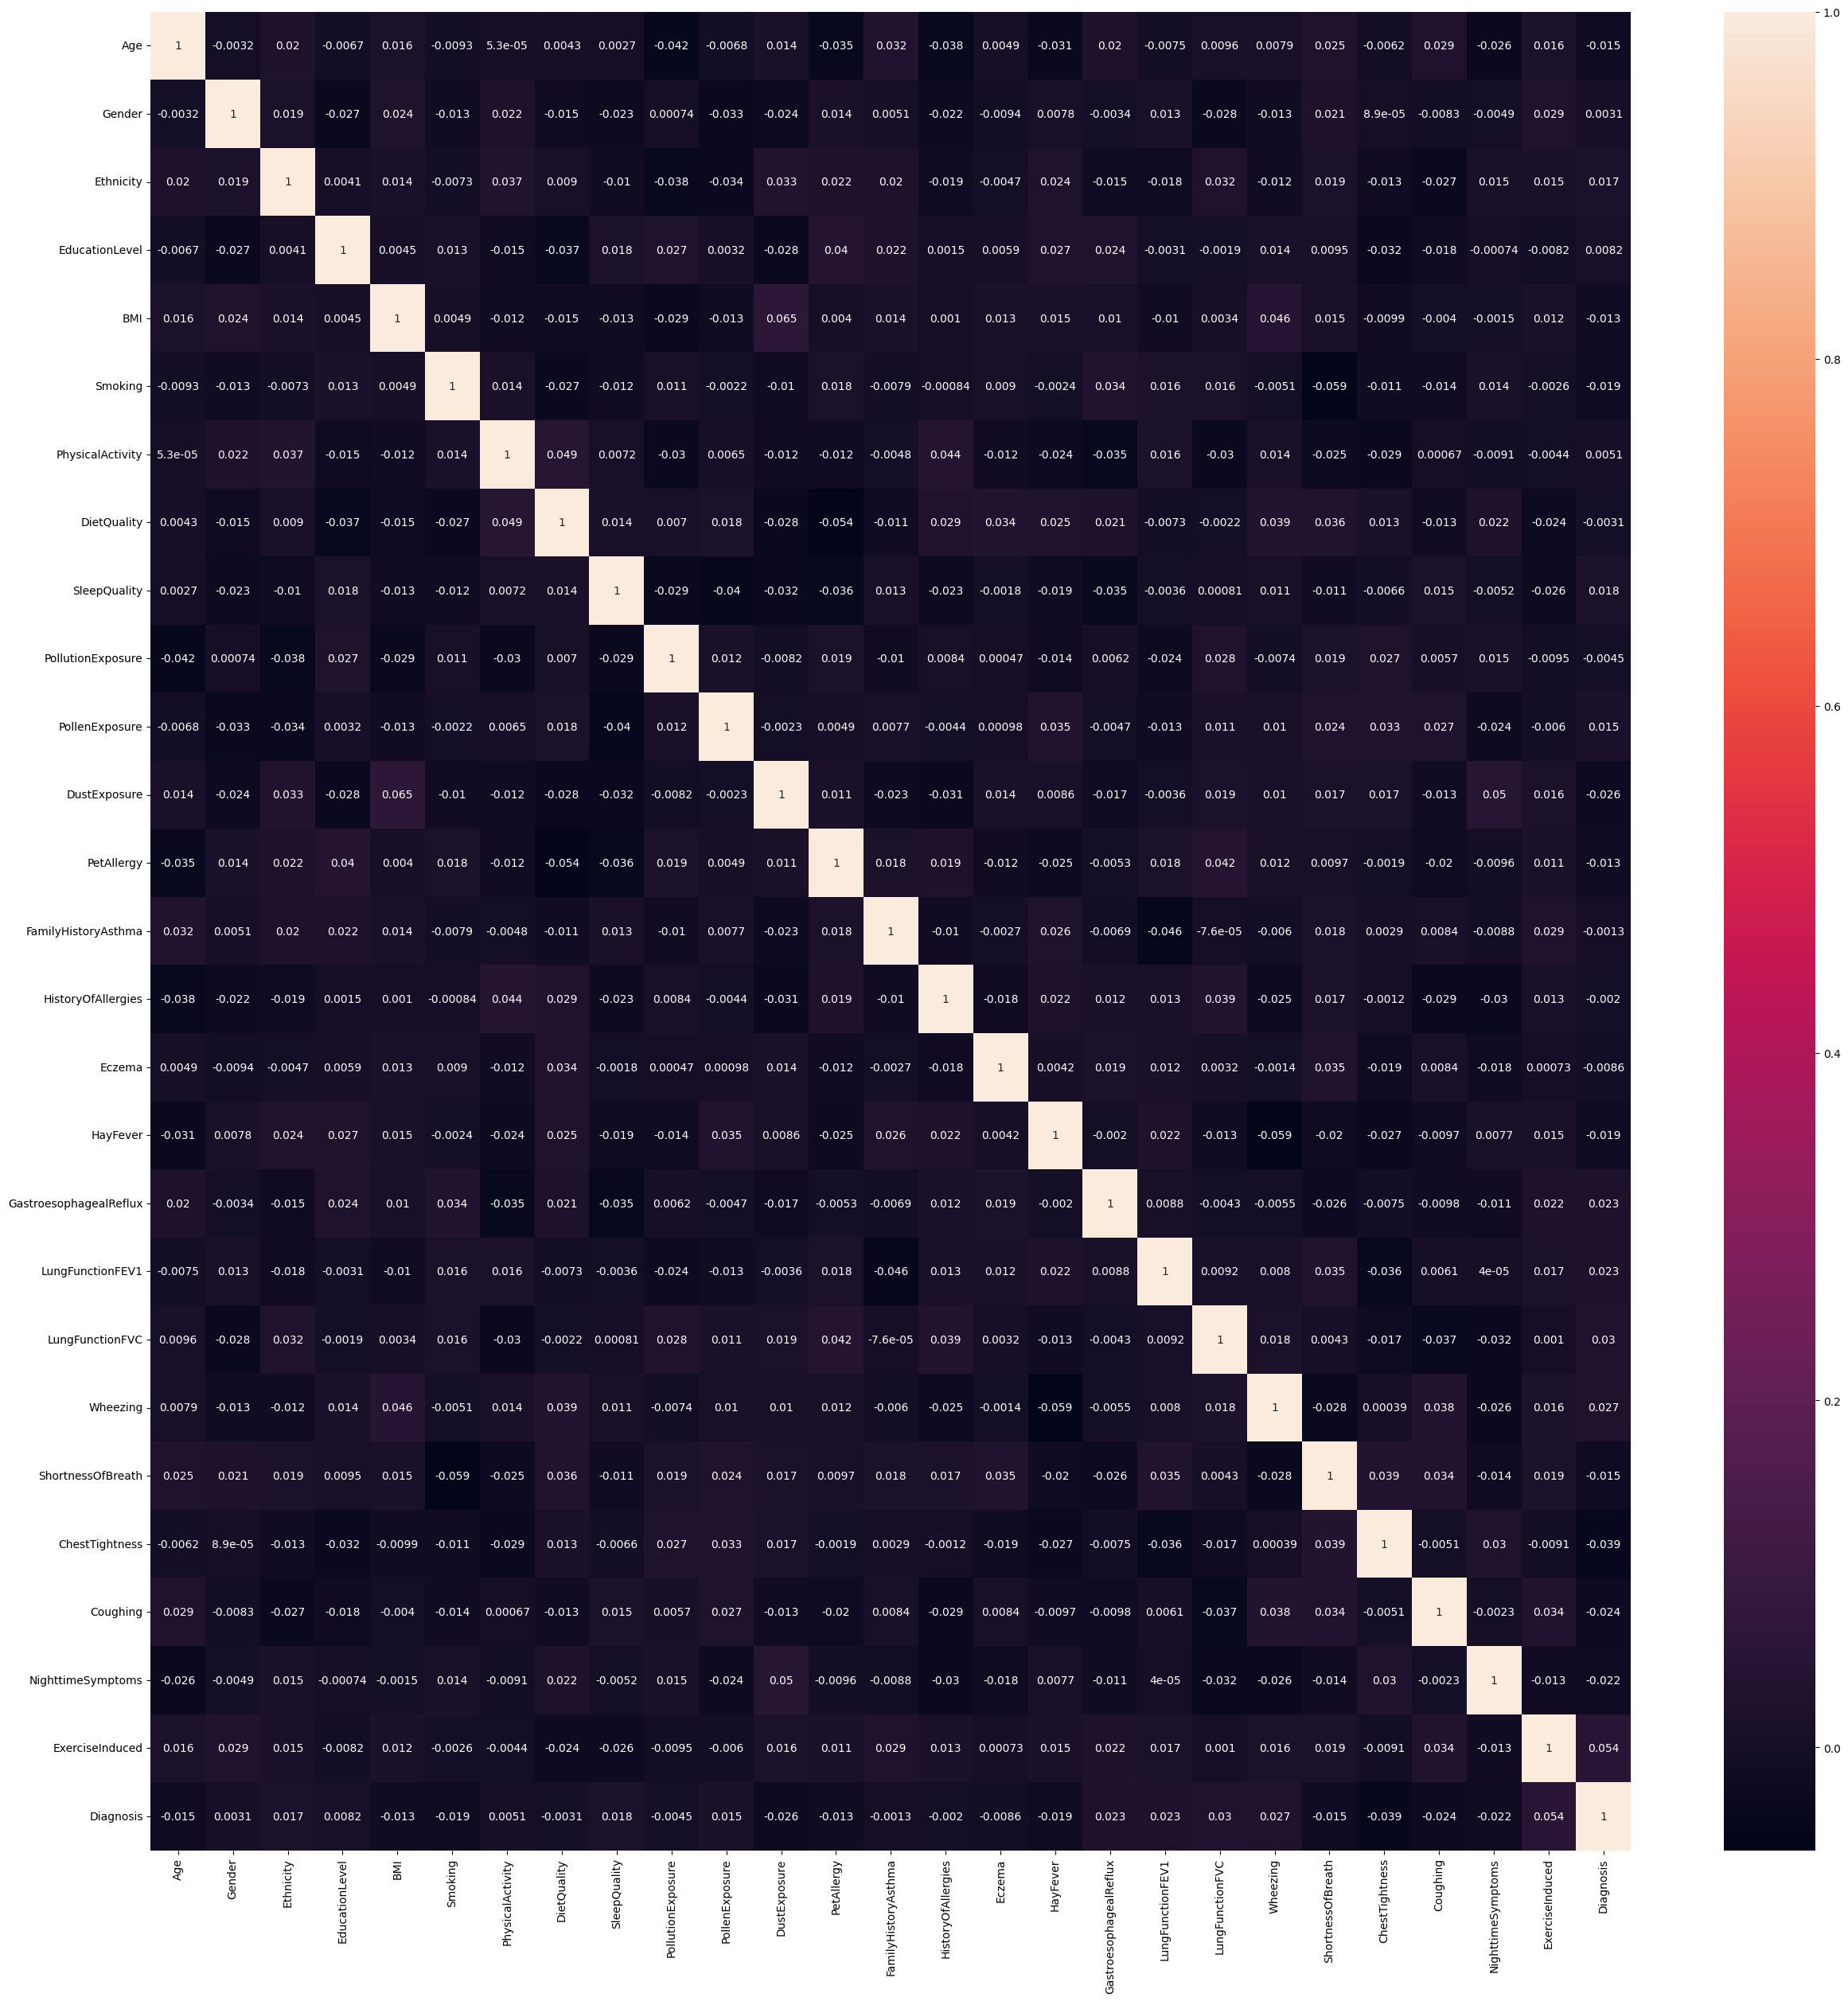

In [11]:
import seaborn as sns
plt.figure(figsize=(30,30))
sns.heatmap(correleation,annot=True)

In [12]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure',
       'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma',
       'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux',
       'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis'],
      dtype='object')

In [13]:
df.drop(['Age','EducationLevel','FamilyHistoryAsthma','DietQuality','HistoryOfAllergies','GastroesophagealReflux','LungFunctionFEV1', 'LungFunctionFVC'],axis=1,inplace=True)

In [14]:
df.columns

Index(['Gender', 'Ethnicity', 'BMI', 'Smoking', 'PhysicalActivity',
       'SleepQuality', 'PollutionExposure', 'PollenExposure', 'DustExposure',
       'PetAllergy', 'Eczema', 'HayFever', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis'],
      dtype='object')

In [15]:
df.drop(['Wheezing','HayFever','Eczema'],axis=1,inplace=True)

In [16]:
df.columns

Index(['Gender', 'Ethnicity', 'BMI', 'Smoking', 'PhysicalActivity',
       'SleepQuality', 'PollutionExposure', 'PollenExposure', 'DustExposure',
       'PetAllergy', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis'],
      dtype='object')

In [17]:
df.sample(5)

,Gender,Ethnicity,BMI,Smoking,PhysicalActivity,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
1193,1,1,16.217346,1,3.389399,5.829007,8.323277,0.007510,5.763722,0,0,1,0,1,1,0
651,0,0,35.118032,0,4.165883,8.205351,2.797222,4.041894,6.449444,0,0,0,1,1,1,0
356,0,1,28.238503,0,8.337677,5.925057,6.927349,5.094131,4.381788,1,1,0,0,1,0,0
1999,0,2,35.997337,0,7.600753,5.410884,4.814441,2.759470,4.849975,0,1,0,0,0,1,0
1475,1,0,23.401827,0,8.693129,5.993002,9.921300,0.473463,6.978544,1,0,1,0,1,0,0


In [18]:
X=df.drop('Diagnosis',axis=1)
y=df['Diagnosis']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier



In [22]:

models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    
]

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score,precision_score,recall_score

In [26]:
best_score=0
best_model=None
for model in models:
    model.fit(x_train_scaled,y_train)
    score=model.score(x_test_scaled,y_test)
    print(f'{model} - {score}')
    y_pred=model.predict(x_test_scaled)
    print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
    print(f'F1 Score: {f1_score(y_test,y_pred)}')
    print(f'Precision Score: {precision_score(y_test,y_pred)}')
    print(f'Recall Score: {recall_score(y_test,y_pred)}')
    print(f'Confusion Matrix: {confusion_matrix(y_test,y_pred)}')
    print(f'Classification Report: {classification_report(y_test,y_pred)}')
    print('-----------------------------------------')

    if score>best_score:
        best_score=score
        best_model=model
print('-----------------------------------------')
print(f'Best Model: {best_model} - {best_score}')



LogisticRegression() - 0.9582463465553236
Accuracy Score: 0.9582463465553236
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix: [[459   0]
 [ 20   0]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       459
           1       0.00      0.00      0.00        20

    accuracy                           0.96       479
   macro avg       0.48      0.50      0.49       479
weighted avg       0.92      0.96      0.94       479

-----------------------------------------
DecisionTreeClassifier() - 0.8997912317327766
Accuracy Score: 0.8997912317327766
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix: [[431  28]
 [ 20   0]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.94      0.95       459
           1       0.00      0.00      0.00        20

    accuracy                           0.90       479
   macro avg       0.

c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

RandomForestClassifier() - 0.9582463465553236
Accuracy Score: 0.9582463465553236
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix: [[459   0]
 [ 20   0]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       459
           1       0.00      0.00      0.00        20

    accuracy                           0.96       479
   macro avg       0.48      0.50      0.49       479
weighted avg       0.92      0.96      0.94       479

-----------------------------------------


c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

GradientBoostingClassifier() - 0.9582463465553236
Accuracy Score: 0.9582463465553236
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix: [[459   0]
 [ 20   0]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       459
           1       0.00      0.00      0.00        20

    accuracy                           0.96       479
   macro avg       0.48      0.50      0.49       479
weighted avg       0.92      0.96      0.94       479

-----------------------------------------


c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

AdaBoostClassifier() - 0.9561586638830898
Accuracy Score: 0.9561586638830898
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix: [[458   1]
 [ 20   0]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       459
           1       0.00      0.00      0.00        20

    accuracy                           0.96       479
   macro avg       0.48      0.50      0.49       479
weighted avg       0.92      0.96      0.94       479

-----------------------------------------
KNeighborsClassifier() - 0.9582463465553236
Accuracy Score: 0.9582463465553236
F1 Score: 0.0
Precision Score: 0.0


c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Recall Score: 0.0
Confusion Matrix: [[459   0]
 [ 20   0]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       459
           1       0.00      0.00      0.00        20

    accuracy                           0.96       479
   macro avg       0.48      0.50      0.49       479
weighted avg       0.92      0.96      0.94       479

-----------------------------------------
SVC() - 0.9582463465553236
Accuracy Score: 0.9582463465553236
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix: [[459   0]
 [ 20   0]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       459
           1       0.00      0.00      0.00        20

    accuracy                           0.96       479
   macro avg       0.48      0.50      0.49       479
weighted avg       0.92      0.96      0.94       479

-----------------------------------------
G

c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...) - 0.9582463465553236
Accuracy Score: 0.9582463465553236
F1 Score: 0.09090909090909091
Precision Score: 0.5
Recall Score: 0.05
Confusion Matrix: [[458   1]
 [ 19   1]]
Classification Report:               precision    recall  f1-score   s

In [27]:
print('-----------------------------------------')
print(f'Best Model: {best_model} - {best_score}')
print(classification_report(y_test,best_model.predict(x_test_scaled)))
cm=confusion_matrix(y_test,best_model.predict(x_test_scaled))


-----------------------------------------
Best Model: LogisticRegression() - 0.9582463465553236
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       459
           1       0.00      0.00      0.00        20

    accuracy                           0.96       479
   macro avg       0.48      0.50      0.49       479
weighted avg       0.92      0.96      0.94       479



c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo